# Notebook with explorative data analysis
See github: https://github.com/luka5132/Agglomerative_Clustering_PSS

**Looks into:**

1.   The effect that the *entry problem* has on clustering with finetuned representations
2.   An in depth look at classificiation results and the effect of viewing K as given
3.   Analysis of hypothesis: that is looking at the distance between VGG representations of pages form the same documents and pages from another document

4.   Testing the preformance of using text vectors as well as combing them using either early or late fusion

5.   Trying to find buzzwords that indicate if a next page belongs to the same document, only look at FP mistakes

6.   Evaluating the effect of predicting K with variety of K multipliers

7.   Looking at the scale of values in representational vectors for different modalities and finetuned vs pretrained


First the predictions are calculated (done more in depth in main notebook)

## Loading in data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from metricutils import *
from utils import *

Mounted at /content/gdrive


In [ ]:
import json
import pandas as pd
import numpy as np

test_text_finetuned_vectors = np.load('/content/gdrive/MyDrive/master_thesis/new_corpus/test/text/finetuned/vectors.npy')
new_image_vectors = np.load('/content/gdrive/MyDrive/master_thesis/new_corpus/vectors.npy')
vector_dict_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/test/vector_dict.json'
test_data_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/test/data_removed.csv'

self_corp1_image = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'


with open(vector_dict_path) as j_obj:
  vector_dict = json.load(j_obj)
  j_obj.close()

test_data = pd.read_csv(test_data_path)

In [ ]:
gold_std_dict = {}

for doc_id,content in test_data.groupby('name'):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std

## Classification result

#### Image

In [ ]:
from tensorflow.keras.models import load_model, Model
image_model = load_model('/content/gdrive/MyDrive/master_thesis/new_corpus/image')

#select only top end of model as we already have the vectors precomputed
layer_name = 'dense'
from_vector_model= Model(inputs=image_model.get_layer(layer_name).output, outputs=image_model.output)
from_vector_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 131,585
Trainable params: 131,585
Non-trainable

In [ ]:
from tqdm import tqdm
import os
prediction_json_corp2 = {}
gold_std_dict = {}

not_found = []
vector_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'
for doc_id,content in tqdm(test_data.groupby('name')):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std
    n_docs = len(gold_std)
    n_pages = sum(gold_std)
    stream_path = os.path.join(vector_path,repl_doc_id + '.npy')
    
    if os.path.exists(stream_path):
      stream_vectors = np.load(stream_path)
      preds_new =from_vector_model.predict(stream_vectors)
      prediction_json_corp2[repl_doc_id] = preds_new
    else:
      not_found.append(repl_doc_id)


  0%|          | 0/32 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 1/32 [00:00<00:30,  1.03it/s]

2/2 [==============================] - 0s 12ms/step


  6%|▋         | 2/32 [00:01<00:22,  1.36it/s]

2/2 [==============================] - 0s 9ms/step


  9%|▉         | 3/32 [00:02<00:18,  1.60it/s]

3/3 [==============================] - 0s 6ms/step


 12%|█▎        | 4/32 [00:02<00:17,  1.63it/s]

3/3 [==============================] - 0s 10ms/step


 16%|█▌        | 5/32 [00:02<00:13,  1.93it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 6/32 [00:03<00:13,  1.93it/s]

3/3 [==============================] - 0s 6ms/step


 22%|██▏       | 7/32 [00:04<00:13,  1.86it/s]

12/12 [==============================] - 0s 4ms/step


 25%|██▌       | 8/32 [00:04<00:12,  1.87it/s]

2/2 [==============================] - 0s 13ms/step


 28%|██▊       | 9/32 [00:05<00:12,  1.87it/s]

4/4 [==============================] - 0s 6ms/step


 31%|███▏      | 10/32 [00:05<00:10,  2.05it/s]

63/63 [==============================] - 0s 4ms/step


 34%|███▍      | 11/32 [00:06<00:12,  1.66it/s]

20/20 [==============================] - 0s 3ms/step


 38%|███▊      | 12/32 [00:06<00:10,  1.83it/s]

15/15 [==============================] - 0s 3ms/step


 41%|████      | 13/32 [00:07<00:09,  2.07it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 14/32 [00:07<00:08,  2.12it/s]

17/17 [==============================] - 0s 3ms/step


 47%|████▋     | 15/32 [00:08<00:07,  2.19it/s]

35/35 [==============================] - 0s 3ms/step


 50%|█████     | 16/32 [00:08<00:08,  1.94it/s]

163/163 [==============================] - 1s 6ms/step


 53%|█████▎    | 17/32 [00:10<00:15,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 18/32 [00:11<00:11,  1.18it/s]

7/7 [==============================] - 0s 6ms/step


 59%|█████▉    | 19/32 [00:12<00:10,  1.25it/s]

6/6 [==============================] - 0s 5ms/step


 62%|██████▎   | 20/32 [00:12<00:08,  1.46it/s]

13/13 [==============================] - 0s 6ms/step


 66%|██████▌   | 21/32 [00:13<00:07,  1.46it/s]

43/43 [==============================] - 0s 6ms/step


 69%|██████▉   | 22/32 [00:14<00:08,  1.24it/s]

17/17 [==============================] - 0s 5ms/step


 72%|███████▏  | 23/32 [00:14<00:06,  1.40it/s]

3/3 [==============================] - 0s 7ms/step


 75%|███████▌  | 24/32 [00:15<00:05,  1.57it/s]

13/13 [==============================] - 0s 8ms/step


 78%|███████▊  | 25/32 [00:15<00:04,  1.67it/s]

10/10 [==============================] - 0s 5ms/step


 81%|████████▏ | 26/32 [00:16<00:03,  1.68it/s]

37/37 [==============================] - 0s 7ms/step


 84%|████████▍ | 27/32 [00:17<00:03,  1.49it/s]

78/78 [==============================] - 1s 6ms/step


 88%|████████▊ | 28/32 [00:18<00:03,  1.24it/s]

63/63 [==============================] - 0s 7ms/step


 91%|█████████ | 29/32 [00:19<00:02,  1.17it/s]

84/84 [==============================] - 1s 6ms/step


 94%|█████████▍| 30/32 [00:20<00:01,  1.06it/s]

75/75 [==============================] - 0s 5ms/step


 97%|█████████▋| 31/32 [00:21<00:00,  1.01it/s]

3/3 [==============================] - 0s 14ms/step


100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


In [ ]:
def set_first_value1(results):
  results[0] = 1
  return results

In [ ]:
# Get labels by simply rounding the prediction score (normal method)
prediction_normal_corp2 ={id: np.round(vals.flatten()) for id,vals in prediction_json_corp2.items()}
#set to different threshold, other corpus showed that t-0.3 yields the highest results
prediction_normal_corp2_t ={id: round_threshold(vals.flatten(), 0.3) for id,vals in prediction_json_corp2.items()}

# Select N (number of docs) highest prediction scores (topN classification method)
# Also always make the first page 1 since that also happens for clustering automatically
prediction_topn_corp2 ={id: set_first_value1(vals.flatten()) for id,vals in prediction_json_corp2.items()}
prediction_topn_corp2 ={id: select_topn(vals,sum(gold_std_dict[id])) for id,vals in prediction_topn_corp2.items()}
# Get prediction scores
prediction_json_features = {id: list(np.round(vals.flatten(),3)) for id,vals in prediction_json_corp2.items()}

gold_std_dict = {id: vals for id,vals in gold_std_dict.items() if id in prediction_normal_corp2}

#### Text

In [ ]:
from tqdm import tqdm
import os
prediction_json_corp2_text = {}

not_found = []
vector_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_predictions'
for doc_id,content in tqdm(test_data.groupby('name')):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std
    n_docs = len(gold_std)
    n_pages = sum(gold_std)
    stream_path = os.path.join(vector_path,repl_doc_id + '.npy')
    
    if os.path.exists(stream_path):
      preds = np.load(stream_path)
      prediction_json_corp2_text[repl_doc_id] = preds
    else:
      not_found.append(repl_doc_id)


100%|██████████| 32/32 [00:10<00:00,  3.17it/s]


In [ ]:
def set_first_value1(results):
  results[0] = 1
  return results

In [ ]:
# Get labels by simply rounding the prediction score (normal method)
prediction_normal_text_corp2 ={id: np.round(vals.flatten()) for id,vals in prediction_json_corp2_text.items()}
#set to different threshold, other corpus showed that t-0.3 yields the highest results
prediction_normal_text_corp2_t ={id: round_threshold(vals.flatten(), 0.3) for id,vals in prediction_json_corp2_text.items()}

# Select N (number of docs) highest prediction scores (topN classification method)
# Also always make the first page 1 since that also happens for clustering automatically
prediction_topn_text_corp2 ={id: set_first_value1(vals.flatten()) for id,vals in prediction_json_corp2_text.items()}
prediction_topn_text_corp2 ={id: select_topn(vals,sum(gold_std_dict[id])) for id,vals in prediction_topn_text_corp2.items()}
# Get prediction scores
prediction_json_features_text = {id: list(np.round(vals.flatten(),3)) for id,vals in prediction_json_corp2_text.items()}

gold_std_dict = {id: vals for id,vals in gold_std_dict.items() if id in prediction_json_corp2_text}

## Clustering results

In [ ]:
gold_std_dict = {}

for doc_id,content in test_data.groupby('name'):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std

In [ ]:
from tqdm import tqdm
used_corpus = test_data
text_vectors_used = test_text_finetuned_vectors
image_vectors_used = new_image_vectors
vector_dict_used = vector_dict

prediction_json_im_noswitch_corp2 = {}
prediction_json_im_switch_corp2 = {}
prediction_json_im_switch_start_corp2 = {}

dist_lists_noswitch_corp2 ={}
dist_lists_switch_corp2 ={}
dist_lists_switch_start_corp2 ={}

vector_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'
for doc_id, content in tqdm(used_corpus.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path,repl_doc_id + '.npy'))
  labels = gold_std_dict[repl_doc_id]

  n_pages = len(labels)
  n_docs = sum(labels)

  if n_pages > 1:
    ## Using switch
    dist_list_switch, preds_switch = cluster_with_switch(labels,image_vectors, False, True)
    dist_list_switch_start, preds_switch_start = cluster_with_switch(labels,image_vectors, labels_bin = True)

    prediction_json_im_switch_corp2[repl_doc_id] = preds_switch
    dist_lists_switch_corp2[repl_doc_id] = dist_list_switch

    prediction_json_im_switch_start_corp2[repl_doc_id] = preds_switch_start
    dist_lists_switch_start_corp2[repl_doc_id] = dist_list_switch_start


    ## Not using switch
    dist_list = []
    c_mat = page_con_matrix(n_pages)
    for i in range(len(image_vectors)-1):
      current_vector = image_vectors[i]
      next_vector = image_vectors[i+1]
      dist = distance.cosine(current_vector, next_vector)
      dist_list.append(dist)
    dist_list = np.array(dist_list)
    if len(dist_list) >1:
      dist_list_norm = (dist_list - np.min(dist_list)) / (np.max(dist_list) - np.min(dist_list))
      nth_highest = np.sort(dist_list_norm)[-n_docs]
    else:
      dist_list_norm = dist_list

    
    dist_lists_noswitch_corp2[repl_doc_id] = dist_list_norm

    if n_pages >1:
      cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='cosine', linkage='average',compute_distances = True, connectivity = c_mat)  
      image_predictions = cluster.fit_predict(image_vectors) 


      prediction_json_im_noswitch_corp2[repl_doc_id] = length_list_to_bin(groups_to_lengths(image_predictions))

100%|██████████| 32/32 [01:08<00:00,  2.14s/it]


#### Text


In [ ]:
from tqdm import tqdm
used_corpus = test_data
text_vectors_used = test_text_finetuned_vectors
image_vectors_used = new_image_vectors
vector_dict_used = vector_dict

prediction_json_text_noswitch_corp2 = {}
prediction_json_text_switch_corp2 = {}
prediction_json_text_switch_start_corp2 = {}

dist_lists_text_noswitch_corp2 ={}
dist_lists_text_switch_corp2 ={}
dist_lists_text_switch_start_corp2 ={}

vector_path = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors_finetuned'
for doc_id, content in tqdm(used_corpus.groupby('name')):
  if doc_id == 'stream_41' or doc_id == 'stream_61':
    continue
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path,repl_doc_id + '.npy')):
    continue
  text_vectors = np.load(os.path.join(vector_path,repl_doc_id + '.npy'))
  labels = gold_std_dict[repl_doc_id]

  n_pages = len(labels)
  n_docs = sum(labels)

  if n_pages > 1:
    ## Using switch
    dist_list_switch, preds_switch = cluster_with_switch(labels,text_vectors, False, True)
    dist_list_switch_start, preds_switch_start = cluster_with_switch(labels,text_vectors, labels_bin = True)

    prediction_json_text_switch_corp2[repl_doc_id] = preds_switch
    dist_lists_text_switch_corp2[repl_doc_id] = dist_list_switch

    prediction_json_text_switch_start_corp2[repl_doc_id] = preds_switch_start
    dist_lists_text_switch_start_corp2[repl_doc_id] = dist_list_switch_start


    ## Not using switch
    dist_list = []
    c_mat = page_con_matrix(n_pages)
    for i in range(len(text_vectors)-1):
      current_vector = text_vectors[i]
      next_vector = text_vectors[i+1]
      dist = distance.cosine(current_vector, next_vector)
      dist_list.append(dist)
    dist_list = np.array(dist_list)
    if len(dist_list) >1:
      dist_list_norm = (dist_list - np.min(dist_list)) / (np.max(dist_list) - np.min(dist_list))
      nth_highest = np.sort(dist_list_norm)[-n_docs]
    else:
      dist_list_norm = dist_list

    
    dist_lists_text_noswitch_corp2[repl_doc_id] = dist_list_norm

    if n_pages >1:
      cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='cosine', linkage='average',compute_distances = True, connectivity = c_mat)  
      image_predictions = cluster.fit_predict(text_vectors) 


      prediction_json_text_noswitch_corp2[repl_doc_id] = length_list_to_bin(groups_to_lengths(image_predictions))

100%|██████████| 32/32 [00:47<00:00,  1.48s/it]


In [ ]:

min2 = True
if min2:
  prediction_json_text_noswitch_corp2 = {stream : preds for stream,preds in prediction_json_text_noswitch_corp2.items() if sum(gold_std_dict[stream]) > 1}
  prediction_json_text_switch_corp2= {stream : preds for stream,preds in prediction_json_text_switch_corp2.items() if sum(gold_std_dict[stream]) > 1}
  prediction_json_text_switch_start_corp2= {stream : preds for stream,preds in prediction_json_text_switch_start_corp2.items() if sum(gold_std_dict[stream]) > 1}
  gold_std_dict = {id: vals for id,vals in gold_std_dict.items() if id in prediction_json_text_noswitch_corp2 }

In [ ]:
noswitch_scores_corp2 = calculate_mean_scores(gold_std_dict,prediction_json_text_noswitch_corp2)
switch_scores_corp2 = calculate_mean_scores(gold_std_dict,prediction_json_text_switch_corp2)
switch_start_scores_corp2 = calculate_mean_scores(gold_std_dict,prediction_json_text_switch_start_corp2)
noswitch_scores_corp2

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.54,0.54,0.54,6525,0.53-0.55,0.53-0.55,0.53-0.55
Bcubed,0.75,0.78,0.68,6525,0.74-0.76,0.77-0.79,0.67-0.69
WindowDiff,0.46,0.46,0.46,6525,0.45-0.47,0.45-0.47,0.45-0.47
Block,0.11,0.11,0.11,6525,0.1-0.12,0.1-0.12,0.1-0.12
Weighted Block,0.28,0.28,0.28,6525,0.27-0.29,0.27-0.29,0.27-0.29


In [ ]:
switch_scores_corp2

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.57,0.57,0.57,6525,0.56-0.58,0.56-0.58,0.56-0.58
Bcubed,0.78,0.80,0.72,6525,0.77-0.79,0.79-0.81,0.71-0.73
WindowDiff,0.59,0.59,0.59,6525,0.58-0.6,0.58-0.6,0.58-0.6
Block,0.36,0.36,0.36,6525,0.35-0.37,0.35-0.37,0.35-0.37
Weighted Block,0.47,0.47,0.47,6525,0.46-0.48,0.46-0.48,0.46-0.48


In [ ]:
switch_start_scores_corp2

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.59,0.59,0.59,6525,0.58-0.6,0.58-0.6,0.58-0.6
Bcubed,0.79,0.80,0.73,6525,0.78-0.8,0.79-0.81,0.72-0.74
WindowDiff,0.59,0.59,0.59,6525,0.58-0.6,0.58-0.6,0.58-0.6
Block,0.38,0.38,0.38,6525,0.37-0.39,0.37-0.39,0.37-0.39
Weighted Block,0.49,0.49,0.49,6525,0.48-0.5,0.48-0.5,0.48-0.5


### VGG clustering results


#### Image VGG Clustering

In [ ]:
gold_std_dict = {}

for doc_id,content in test_data.groupby('name'):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std

In [ ]:
from tqdm import tqdm
used_standard = gold_std_dict
used_corpus = test_data
text_vectors_used = test_text_finetuned_vectors
image_vectors_used = new_image_vectors
vector_dict_used = vector_dict


prediction_json_im_noswitch_VGG_corp2 = {}
prediction_json_im_switch_VGG_corp2 = {}
prediction_json_im_switch_start_VGG_corp2 = {}

dist_lists_noswitch_VGG_corp2 ={}
dist_lists_switch_VGG_corp2 ={}
dist_lists_switch_start_VGG_corp2 ={}

for doc_id, content in tqdm(used_corpus.groupby('name')):
    repl_doc_id = doc_id.replace('__concatenated','')
    corpus = content['corpus'].iloc[0]
    gold_std = used_standard[repl_doc_id]
    n_docs = sum(gold_std)
    n_pages = len(gold_std)
    corpus_im_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/VGG_vectors'.format(corpus+1)
    
    im_page_vectors_path = os.path.join(corpus_im_folder,doc_id+'.npy')
    if not os.path.exists(im_page_vectors_path):
      continue
    
    im_page_vectors = np.load(im_page_vectors_path)
    if n_pages > 1:
      ## Using switch
      dist_list_switch, preds_switch = cluster_with_switch(gold_std,im_page_vectors, False,True)
      dist_list_switch_start, preds_switch_start = cluster_with_switch(gold_std,im_page_vectors,True,True)

      prediction_json_im_switch_VGG_corp2[repl_doc_id] = preds_switch
      dist_lists_switch_VGG_corp2[repl_doc_id] = dist_list_switch

      prediction_json_im_switch_start_VGG_corp2[repl_doc_id] = preds_switch_start
      dist_lists_switch_start_VGG_corp2[repl_doc_id] = dist_list_switch_start


      ## Not using switch
      dist_list = []
      c_mat = page_con_matrix(n_pages)
      for i in range(len(im_page_vectors)-1):
        current_vector = im_page_vectors[i]
        next_vector = im_page_vectors[i+1]
        dist = distance.cosine(current_vector, next_vector)
        dist_list.append(dist)
      dist_list = np.array(dist_list)
      if len(dist_list) >1:
        dist_list_norm = (dist_list - np.min(dist_list)) / (np.max(dist_list) - np.min(dist_list))
        nth_highest = np.sort(dist_list_norm)[-n_docs]
      else:
        dist_list_norm = dist_list

      
      dist_lists_noswitch_VGG_corp2[repl_doc_id] = dist_list_norm

      if n_pages >1:
        cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='cosine', linkage='average',compute_distances = True, connectivity = c_mat)  
        image_predictions = cluster.fit_predict(im_page_vectors) 


        prediction_json_im_noswitch_VGG_corp2[repl_doc_id] = length_list_to_bin(groups_to_lengths(image_predictions))

100%|██████████| 32/32 [00:51<00:00,  1.62s/it]


# Effect of entry problem

In [ ]:
def find_indexes_of_ett(preds, gs, auto_switch = False):
  etts = []
  prev_ind = 0
  in_prob = False
  for i, pred in enumerate(preds):
    gv = gs[i]
    if abs(pred-gv) == 1:
      if not in_prob:
        prev_ind = i
        in_prob = True
    else:
      if in_prob:
        prob_len = i-1 - prev_ind
        if prob_len >= 10 and sum(preds[prev_ind:i]) > 3:
          etts.append(([prev_ind,i], sum(preds[prev_ind:i])))
        in_prob = False

  if auto_switch:
    fixed_res = preds.copy()
    for ett in etts:
      fixed_res[ett[0][0]+1:ett[0][1]] = np.array([abs(1-x) for x in fixed_res[ett[0][0]+1:ett[0][1]]])
    return etts, fixed_res
  return etts


In [ ]:
def get_etts(pred_d, gld_d):
  new_preds = {}
  all_etts = []
  for stream,preds in pred_d.items():
    gs_s = gld_d[stream]
    new_ett,fixed = find_indexes_of_ett(preds,gs_s, True)
    if new_ett:
      ett_l = new_ett[0][0][1] - new_ett[0][0][0]
      new_preds[stream] = fixed
      all_etts += new_ett
    else:
      new_preds[stream] = preds
  return all_etts, new_preds

In [ ]:
im_ett_sw, im_fixed_sw = get_etts(prediction_json_im_switch_start_corp2, gold_std_dict)
im_ett_nsw, im_fixed_nsw = get_etts(prediction_json_im_noswitch_corp2, gold_std_dict)

text_ett_sw, text_fixed_sw = get_etts(prediction_json_text_switch_start_corp2, gold_std_dict)
text_ett_nsw, text_fixed_nsw = get_etts(prediction_json_text_noswitch_corp2, gold_std_dict)

comb_ett_sw, comb_fixed_sw = get_etts(prediction_json_comb, gold_std_dict)
comb_ett_nsw, comb_fixed_nsw = get_etts(prediction_json_comb_nsw, gold_std_dict)

In [ ]:
im_ett_sw_len = [x[1]-x[0] for x,y in im_ett_sw]
im_ett_nsw_len = [x[1]-x[0] for x,y in im_ett_nsw]
text_ett_sw_len = [x[1]-x[0] for x,y in text_ett_sw]
text_ett_nsw_len = [x[1]-x[0] for x,y in text_ett_nsw]
comb_ett_sw_len = [x[1]-x[0] for x,y in comb_ett_sw]
comb_ett_nsw_len = [x[1]-x[0] for x,y in comb_ett_nsw]

print(np.sum(im_ett_sw_len))
print(np.sum(im_ett_nsw_len))
print(np.sum(text_ett_sw_len))
print(np.sum(text_ett_nsw_len))
print(np.sum(comb_ett_sw_len))
print(np.sum(comb_ett_nsw_len))

1268
0.0
1138
0.0
1341
16


In [ ]:
len(im_fixed_sw.keys())

32

In [ ]:
new_preds = {}
all_etts = []
for stream,preds in prediction_json_im_switch_start_corp2.items():
  gs_s = gold_std_dict[stream]
  new_ett,fixed = find_indexes_of_ett(preds,gs_s, True)
  if new_ett:
    ett_l = new_ett[0][0][1] - new_ett[0][0][0]
    new_preds[stream] = fixed
    all_etts += new_ett

In [ ]:
calculate_mean_scores(gold_std_dict,im_fixed_sw)

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.74,0.71,0.72,6476,0.73-0.75,0.7-0.72,0.71-0.73
Bcubed,0.82,0.88,0.80,6476,0.81-0.83,0.87-0.89,0.79-0.81
WindowDiff,0.68,0.68,0.68,6476,0.67-0.69,0.67-0.69,0.67-0.69
Block,0.52,0.50,0.51,6476,0.51-0.53,0.49-0.51,0.5-0.52
Weighted Block,0.65,0.62,0.63,6476,0.64-0.66,0.61-0.63,0.62-0.64


In [ ]:
calculate_mean_scores(gold_std_dict,text_fixed_sw)

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.67,0.66,0.66,6476,0.66-0.68,0.65-0.67,0.65-0.67
Bcubed,0.81,0.84,0.77,6476,0.8-0.82,0.83-0.85,0.76-0.78
WindowDiff,0.63,0.63,0.63,6476,0.62-0.64,0.62-0.64,0.62-0.64
Block,0.45,0.45,0.45,6476,0.44-0.46,0.44-0.46,0.44-0.46
Weighted Block,0.57,0.56,0.57,6476,0.56-0.58,0.55-0.57,0.56-0.58


In [ ]:
calculate_mean_scores(gold_std_dict,comb_fixed_sw)

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.78,0.77,0.77,6476,0.77-0.79,0.76-0.78,0.76-0.78
Bcubed,0.86,0.90,0.84,6476,0.85-0.87,0.89-0.91,0.83-0.85
WindowDiff,0.72,0.72,0.72,6476,0.71-0.73,0.71-0.73,0.71-0.73
Block,0.60,0.59,0.60,6476,0.59-0.61,0.58-0.6,0.59-0.61
Weighted Block,0.69,0.68,0.68,6476,0.68-0.7,0.67-0.69,0.67-0.69


In [ ]:
ett_lenghts = [x[1]-x[0] for x,y in all_etts]
print(np.mean(ett_lenghts))

20.50877192982456


In [ ]:
sum(ett_lenghts)

1169

In [ ]:
new_preds = {}
all_etts = []
for stream,preds in prediction_json_text_switch_start_corp2.items():
  gs_s = gold_std_dict[stream]
  new_ett,fixed = find_indexes_of_ett(preds,gs_s, True)
  if new_ett:
    ett_l = new_ett[0][0][1] - new_ett[0][0][0]
    new_preds[stream] = fixed
    all_etts += new_ett

In [ ]:
ett_lenghts = [x[1]-x[0] for x,y in all_etts]
print(np.mean(ett_lenghts))

19.60377358490566


In [ ]:
sum(ett_lenghts)

1039

In [ ]:
new_preds = {}
all_etts = []
for stream,preds in prediction_json_comb.items():
  gs_s = gold_std_dict[stream]
  new_ett,fixed = find_indexes_of_ett(preds,gs_s, True)
  if new_ett:
    ett_l = new_ett[0][0][1] - new_ett[0][0][0]
    new_preds[stream] = fixed
    all_etts += new_ett

In [ ]:
ett_lenghts = [x[1]-x[0] for x,y in all_etts]
print(np.mean(ett_lenghts))

22.381818181818183


In [ ]:
sum(ett_lenghts)

1231

In [ ]:
prediction_json_im_noswitch_corp2

0.04652921509313804

In [ ]:
new_preds = {}
all_etts = []
for stream,preds in prediction_json_comb.items():
  gs_s = gold_std_dict[stream]
  new_ett,fixed = find_indexes_of_ett(preds,gs_s, True)
  if new_ett:
    ett_l = new_ett[0][0][1] - new_ett[0][0][0]
    new_preds[stream] = fixed
    all_etts += new_ett

In [ ]:
ett_lenghts = [x[1]-x[0] for x,y in all_etts]
print(np.mean(ett_lenghts))

20.630769230769232


In [ ]:
sum(ett_lenghts)

1341

# In depth look in classification scores

### Weighted Block / Doc F1

Change `IoU_TruePositives()` function so that it now returns the doc_id, true positive sets and true positive score for analysis 

In [ ]:
def IoU_TruePositives(t,h, doc_id):
    '''A True Positive is a pair h_block, t_block with an IoU>.5.
    This function returns the sum of all IoUs(h_block,t_block) for these bvlocks in t and h.'''
    def IoU(S,T):
        '''Jaccard similarity between sets S and T'''
        return len(S&T)/len(S|T)
    def get_docs(t):
        '''Get the set of documents (where each document is a set of pagenumbers)'''
        return {frozenset(S) for S in make_index_doc_lengths(t).values()}
    def find_match(S,Candidates):
        '''Finds, if it exists,  the unique T in Candidates such that IoU(S,T) >.5'''
        return [T for T in Candidates if IoU(S,T) >.5]
    t,h= get_docs(t), get_docs(h) # switch to set of docs representation
    return [(doc_id,S,IoU(S,find_match(S,t)[0])) for S in h if find_match(S,t)]

Add IoU scores per stream to list

In [ ]:
IoU_tp_normal = []
IoU_tp_topk = []
doc_id = 0
for stream, normal in prediction_normal_corp2.items():
  gs = gold_std_dict[stream]
  topk = prediction_topn_corp2[stream]
  normal_pred = prediction_normal_corp2[stream]
  IoU_tp_topk += IoU_TruePositives(bin_to_length_list(gs),bin_to_length_list(topk),doc_id)
  IoU_tp_normal += IoU_TruePositives(bin_to_length_list(gs),bin_to_length_list(normal),doc_id)

  #keep track of doc_id so that different sets are properly split and not
  #seen as the same
  doc_id +=1


Total amount of predictions for normal and top-k classification

In [ ]:
tot_1_normal = sum([sum(y) for y in prediction_normal_corp2.values()])
tot_1_topk = sum([sum(y) for y in prediction_topn_corp2.values()])
print(tot_1_normal,tot_1_topk)

6008.0 6476.0


In [ ]:
# Look at all changed sets.
#Total of 2234 different sets (i.e. true positives)
different_total = list(set(IoU_tp_topk).symmetric_difference(set(IoU_tp_normal)))
new = list(set(IoU_tp_topk) -set(IoU_tp_normal))
changed = list(set(IoU_tp_normal) -set(IoU_tp_topk))
print(len(different_total),len(new),len(changed))
avg_len = np.mean([len(s[1]) for s in new])
print(avg_len)
avg_len = np.mean([len(s[1]) for s in changed])
print(avg_len)
avg_iou_score = np.mean([s[2] for s in new])
print(avg_iou_score)
avg_iou_score = np.mean([s[2] for s in changed])
print(avg_iou_score)

2233 1701 532
4.554379776601999
9.847744360902256
0.9623459622139406
0.7312303363947863


In [ ]:
len_less_than2 = sum([s[2] for s in IoU_tp_normal if len(s[1]) <= 2])
len_more_than2 = sum([s[2] for s in IoU_tp_normal if len(s[1]) > 2])
print('normal_scores')
print('true predicted docs with less than 2 pages: ', len_less_than2)
print('more than two pages: ',len_more_than2)
print('total true positives: ' ,len_less_than2+len_more_than2)

len_less_than2 = sum([s[2] for s in IoU_tp_topk if len(s[1]) <= 2])
len_more_than2 = sum([s[2] for s in IoU_tp_topk if len(s[1]) > 2])
print('top-k scores')
print('true predicted docs with less than 2 pages: ',len_less_than2)
print('more than two pages: ',len_more_than2)
print('total true positives: ',len_less_than2+len_more_than2)

normal_scores
true predicted docs with less than 2 pages:  2664.0000000000014
more than two pages:  1810.0804693331484
total true positives:  4474.08046933315
top-k scores
true predicted docs with less than 2 pages:  3497.666666666664
more than two pages:  2224.349745430369
total true positives:  5722.016412097033


### Boundary and Page F1

In [ ]:
def get_base_met(gs, pred):
  """
  Small function to get base metric scores for boundary classification 
  """
  tot_1 = sum(gs)
  comb = pred - gs
  fn = len(np.where(comb == -1)[0])
  fp = len(np.where(comb == 1)[0])
  tp = tot_1 - fn
  tn = len(gs) - tot_1 - fn
  return {'tp' :tp, 'tn' :tn,'fp' :fp,'fn':fn}

In [ ]:
from collections import Counter
#get scores for normal and top-k
tp_normal = [get_base_met(gold_std_dict[x],prediction_normal_corp2[x]) for x in prediction_normal_corp2]
tp_topk = [get_base_met(gold_std_dict[x],prediction_topn_corp2[x]) for x in prediction_topn_corp2]

Count all scores up

In [ ]:
normal_tot = Counter()
topk_tot = Counter()
for i in range(len(tp_normal)):
  normal_tot.update(tp_normal[i])
  topk_tot.update(tp_topk[i])

In [ ]:
normal_tot

Counter({'tp': 5769, 'tn': 17941, 'fp': 239, 'fn': 707})

In [ ]:
topk_tot

Counter({'tp': 5999, 'tn': 18171, 'fp': 477, 'fn': 477})

In [ ]:
sum([sum(x) for x in gold_std_dict.values()])

6476

# Calculating distance between VGG representations
 

In [ ]:
from collections import Counter
from tqdm import tqdm
used_corpus = test_data
used_standard = gold_std_dict

total_dist_counter = Counter()
individual_dists = {}
for doc_id, content in tqdm(used_corpus.groupby('name')):
    repl_doc_id = doc_id.replace('__concatenated','')
    corpus = content['corpus'].iloc[0]
    gold_std = used_standard[repl_doc_id]
    n_docs = sum(gold_std)
    n_pages = len(gold_std)
    corpus_im_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/VGG_vectors'.format(corpus+1)
    
    im_page_vectors_path = os.path.join(corpus_im_folder,doc_id+'.npy')
    if not os.path.exists(im_page_vectors_path):
      continue
    
    im_page_vectors = np.load(im_page_vectors_path)
    dist_dict_all = distance_against_eachother(im_page_vectors, gold_std)
    individual_dists[doc_id] = dist_dict_all
    total_dist_counter.update(dist_dict_all)

 29%|██▉       | 10/34 [01:04<02:34,  6.45s/it]


KeyboardInterrupt: ignored

In [ ]:
for key,val in total_dist_counter.items():
  print(key)
  print(val / 34)

same_document
0.2315279306885405
different_document
0.2357630071387904


In [ ]:
from scipy import stats
same_doc = []
diff_doc = []
for key,val in individual_dists.items():
  same_doc.append(val['same_document'])
  diff_doc.append(val['different_document'])

stats.ttest_ind(same_doc, diff_doc)

Ttest_indResult(statistic=-0.3365771744819045, pvalue=0.737536818937613)

In [ ]:
diffs = pd.DataFrame(list(individual_dists.keys()), columns = ['stream'])
diffs['same_doc'] = same_doc
diffs['diff_doc'] = diff_doc
diffs.to_csv('/content/gdrive/MyDrive/master_thesis/new_corpus/differences.csv', index = False)

# Testing multimodality


## Combining modalities

#### Late fusion

Finetuned

In [ ]:
def combine_distlists(dl1,dl2, k1, k2, to_dist_mat = True):
  n_pages = len(dl1)
  combined_dl = np.zeros(n_pages)
  for i in range(n_pages):
    dl1_val = dl1[i]
    dl2_val = dl2[i]

    cmbd_val1 = np.power(dl1_val,k1)
    cmbd_val2 = np.power(dl2_val,k2)

    cmbd_val12 = cmbd_val1 * cmbd_val2
    combined_dl[i] = cmbd_val12

  dist_mat = np.zeros((n_pages+1,n_pages+1))

  for i,dist in enumerate(combined_dl):
    if i < n_pages:
      dist_mat[i,i+1] = dist
      dist_mat[i+1,i] = dist
  if to_dist_mat:
    return dist_mat

  return combined_dl

In [ ]:
all_res= pd.DataFrame(columns =['i','j','method','Boundary','PQ'])

combined_dist_list_nsw ={}
combined_dist_list_sw ={}
combined_dist_list_sws ={}

i = 1
j = 1
nsw_preds = {'bd' : [],'wb':[]}
sw_preds = {'bd' : [],'wb':[]}
sws_preds = {'bd' : [],'wb':[]}
j = np.round(j,1)
for doc,dl in dist_lists_noswitch_corp2.items():
  n_docs = int(sum(gold_std_dict[doc]))
  n_pages = len(gold_std_dict[doc])
  c_mat = page_con_matrix(n_pages)

  if n_pages > 1:
    cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='precomputed', linkage='average', connectivity=c_mat)  
    text_dl = dist_lists_text_noswitch_corp2[doc]
    combined_dist_list_nsw[doc] =  combine_distlists(dl,text_dl,i,j)
    preds = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_nsw[doc])))
    nsw_preds['bd'].append(f1(gold_std_dict[doc], preds))
    nsw_preds['wb'].append(IoU_F1(bin_to_length_list(gold_std_dict[doc]), bin_to_length_list(preds)))

    dl = dist_lists_switch_corp2[doc]
    text_dl = dist_lists_text_switch_corp2[doc]
    combined_dist_list_sw[doc] =  combine_distlists(dl,text_dl,i,j)
    preds = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_sw[doc])))
    sw_preds['bd'].append(f1(gold_std_dict[doc], preds))
    sw_preds['wb'].append(IoU_F1(bin_to_length_list(gold_std_dict[doc]), bin_to_length_list(preds)))

    dl =dist_lists_switch_start_corp2[doc]
    text_dl = dist_lists_text_switch_start_corp2[doc]
    combined_dist_list_sws[doc] =  combine_distlists(dl,text_dl,i,j)
    preds = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_sws[doc])))
    sws_preds['bd'].append(f1(gold_std_dict[doc], preds))
    sws_preds['wb'].append(IoU_F1(bin_to_length_list(gold_std_dict[doc]), bin_to_length_list(preds)))
  
nsw_row = [i,j,'noswitch',np.mean(nsw_preds['bd']),np.mean(nsw_preds['wb'])]
sw_row = [i,j,'switch',np.mean(sw_preds['bd']),np.mean(sw_preds['wb'])]
sws_row = [i,j,'switch_start',np.mean(sws_preds['bd']),np.mean(sws_preds['wb'])]

all_res.loc[len(all_res)] = nsw_row
all_res.loc[len(all_res)] = sw_row
all_res.loc[len(all_res)] = sws_row


In [ ]:
all_res

,i,j,method,Boundary,PQ
0,1,1,noswitch,0.573826,0.303456
1,1,1,switch,0.637225,0.518613
2,1,1,switch_start,0.648033,0.535067


Pretrained

In [ ]:
gold_std_dict = {}

for doc_id,content in test_data.groupby('name'):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict[repl_doc_id] = gold_std

late fusion

In [ ]:

all_res= pd.DataFrame(columns =['i','j','method','Boundary','PQ'])

combined_dist_list_nsw ={}
combined_dist_list_sw ={}
combined_dist_list_sws ={}

nsw_preds = {}
sw_preds = {}
sws_preds = {}
i = 0.1
j = 0.1

for doc,dl in dist_lists_noswitch_VGG_corp2.items():
  n_docs = int(sum(gold_std_dict[doc]))
  n_pages = len(gold_std_dict[doc])
  c_mat = page_con_matrix(n_pages)

  if n_docs > 1:
    cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='precomputed', linkage='average', connectivity=c_mat)  
    text_dl = text_dist_list_noswitch_VGG_corp2[doc]
    combined_dist_list_nsw[doc] =  combine_distlists(dl,text_dl,i,j)
    nsw_preds[doc] = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_nsw[doc])))

    dl = dist_lists_switch_VGG_corp2[doc]
    text_dl = text_dist_list_switch_VGG_corp2[doc]
    combined_dist_list_sw[doc] =  combine_distlists(dl,text_dl,i,j)
    sw_preds[doc] = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_sw[doc])))

    dl =dist_lists_switch_start_VGG_corp2[doc]
    text_dl = text_dist_list_switch_start_VGG_corp2[doc]
    combined_dist_list_sws[doc] =  combine_distlists(dl,text_dl,i,j)
    sws_preds[doc] = length_list_to_bin(groups_to_lengths(cluster.fit_predict(combined_dist_list_sws[doc])))


In [ ]:
gold_std_dict = {id: vals for id,vals in gold_std_dict.items() if id in sws_preds}
nsw_res = calculate_mean_scores(gold_std_dict,nsw_preds)
sw_res = calculate_mean_scores(gold_std_dict,sw_preds)
sws_res = calculate_mean_scores(gold_std_dict,sws_preds)

nsw_row = [i,j,'noswitch',nsw_res.loc['Boundary']['F1'],nsw_res.loc['Weighted Block']['F1']]
sw_row = [i,j,'switch',sw_res.loc['Boundary']['F1'],sw_res.loc['Weighted Block']['F1']]
sws_row = [i,j,'switch_start',sws_res.loc['Boundary']['F1'],sws_res.loc['Weighted Block']['F1']]

all_res.loc[len(all_res)] = nsw_row
all_res.loc[len(all_res)] = sw_row
all_res.loc[len(all_res)] = sws_row

In [ ]:
all_res

,i,j,method,Boundary,PQ
0,0.1,0.1,noswitch,0.48,0.25
1,0.1,0.1,switch,0.41,0.26
2,0.1,0.1,switch_start,0.42,0.27


#### Early Fusion 

Finetuned

In [ ]:
vector_path_im = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'
vector_path_text = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors_finetuned'
im_sums = []
text_sums = []
for doc_id, content in tqdm(test_data.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path_text,repl_doc_id + '.npy')):
    continue
  text_vectors = np.load(os.path.join(vector_path_text,repl_doc_id + '.npy'))
  labels = gold_std_dict[repl_doc_id]

  if not os.path.exists(os.path.join(vector_path_im,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path_im,repl_doc_id + '.npy'))

  im_sum = np.sum(abs(image_vectors)) / (image_vectors.shape[0] * image_vectors.shape[1])
  text_sum = np.sum(abs(text_vectors)) / (text_vectors.shape[0] * text_vectors.shape[1])

  im_sums.append(im_sum)
  text_sums.append(text_sum)


In [ ]:

prediction_json_comb = {}
prediction_json_comb_nsw = {}
prediction_json_im = {}
prediction_json_text = {}
gold_std_bin = {}

vector_path_im = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'
vector_path_text = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors_finetuned'
for doc_id, content in tqdm(test_data.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path_text,repl_doc_id + '.npy')):
    continue
  text_vectors = np.load(os.path.join(vector_path_text,repl_doc_id + '.npy'))
  labels = gold_std_dict[repl_doc_id]

  if not os.path.exists(os.path.join(vector_path_im,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path_im,repl_doc_id + '.npy'))

  im_sum = np.sum(abs(image_vectors)) / (image_vectors.shape[0] * image_vectors.shape[1])
  text_sum = np.sum(abs(text_vectors)) / (text_vectors.shape[0] * text_vectors.shape[1])
  if im_sum > text_sum:
    image_vectors = image_vectors / (im_sum / text_sum)
  else:
    text_vectors = text_vectors / (text_sum / im_sum)


  combined_vectors = np.concatenate([image_vectors,text_vectors],axis=1)

  if n_pages > 1:
    ## Using switch
    _, preds_im = cluster_with_switch(labels,image_vectors, labels_bin = True)
    _, preds_text = cluster_with_switch(labels,text_vectors, labels_bin = True)
    _, preds_cmbd = cluster_with_switch(labels,combined_vectors, labels_bin = True)

    prediction_json_comb[doc_id] = preds_cmbd
    prediction_json_im[doc_id] = preds_im
    prediction_json_text[doc_id] = preds_text

    n_docs = sum(labels)
    n_pages = len(labels)
    c_mat = page_con_matrix(n_pages)
    cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='cosine', linkage='average',compute_distances = True, connectivity = c_mat)  
    cmbd_nsw_predictions = cluster.fit_predict(combined_vectors) 


    prediction_json_comb_nsw[repl_doc_id] = length_list_to_bin(groups_to_lengths(cmbd_nsw_predictions))

100%|██████████| 32/32 [00:13<00:00,  2.40it/s]


In [ ]:

prediction_json_comb_pre = {}
prediction_json_comb_nsw_pre = {}
prediction_json_im_pre = {}
prediction_json_text_pre = {}
gold_std_bin_pre = {}

vector_path_im = '/content/gdrive/MyDrive/master_thesis/new_corpus/VGG_vectors'
vector_path_text = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors'
for doc_id, content in tqdm(test_data.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  text_page_vectors_path = os.path.join(vector_path_text,repl_doc_id+'.pickle')
  if not os.path.exists(text_page_vectors_path):
    continue
  
  with open(text_page_vectors_path, 'rb') as f:
    text_vectors = pickle.load(f)
    f.close()

  labels = gold_std_dict[repl_doc_id]

  if not os.path.exists(os.path.join(vector_path_im,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path_im,repl_doc_id + '.npy'))

  im_sum = np.sum(abs(image_vectors)) / (image_vectors.shape[0] * image_vectors.shape[1])
  text_sum = np.sum(abs(text_vectors)) / (text_vectors.shape[0] * text_vectors.shape[1])
  if im_sum > text_sum:
    image_vectors = image_vectors / (im_sum / text_sum)
  else:
    text_vectors = text_vectors / (text_sum / im_sum)


  combined_vectors = np.concatenate([image_vectors,text_vectors],axis=1)

  if n_pages > 1:
    ## Using switch
    _, preds_im = cluster_with_switch(labels,image_vectors, labels_bin = True)
    _, preds_text = cluster_with_switch(labels,text_vectors, labels_bin = True)
    _, preds_cmbd = cluster_with_switch(labels,combined_vectors, labels_bin = True)

    prediction_json_comb_pre[doc_id] = preds_cmbd
    prediction_json_im_pre[doc_id] = preds_im
    prediction_json_text_pre[doc_id] = preds_text

    n_docs = sum(labels)
    n_pages = len(labels)
    c_mat = page_con_matrix(n_pages)
    cluster = AgglomerativeClustering(n_clusters=n_docs, affinity='cosine', linkage='average',compute_distances = True, connectivity = c_mat)  
    cmbd_nsw_predictions = cluster.fit_predict(combined_vectors) 


    prediction_json_comb_nsw_pre[repl_doc_id] = length_list_to_bin(groups_to_lengths(cmbd_nsw_predictions))

100%|██████████| 32/32 [00:38<00:00,  1.19s/it]


In [ ]:
min2 = True
if min2:
  prediction_json_comb = {stream : preds for stream,preds in prediction_json_comb.items() if sum(gold_std_dict[stream]) > 1}
  prediction_json_im= {stream : preds for stream,preds in prediction_json_im.items() if sum(gold_std_dict[stream]) > 1}
  prediction_json_text= {stream : preds for stream,preds in prediction_json_text.items() if sum(gold_std_dict[stream]) > 1}
  prediction_json_comb_nsw= {stream : preds for stream,preds in prediction_json_comb_nsw.items() if sum(gold_std_dict[stream]) > 1}
  gold_std_dict = {id: vals for id,vals in gold_std_dict.items() if id in prediction_json_text }

In [ ]:
cmbd_scores_nsw = calculate_mean_scores(gold_std_dict,prediction_json_comb_nsw)
cmbd_scores_nsw

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.49,0.49,0.49,6476,0.48-0.5,0.48-0.5,0.48-0.5
Bcubed,0.70,0.72,0.59,6476,0.69-0.71,0.71-0.73,0.58-0.6
WindowDiff,0.34,0.34,0.34,6476,0.33-0.35,0.33-0.35,0.33-0.35
Block,0.11,0.11,0.11,6476,0.1-0.12,0.1-0.12,0.1-0.12
Weighted Block,0.24,0.24,0.24,6476,0.23-0.25,0.23-0.25,0.23-0.25


In [ ]:
im_scores = calculate_mean_scores(gold_std_dict,prediction_json_im)
text_scores = calculate_mean_scores(gold_std_dict,prediction_json_text)
cmbd_scores = calculate_mean_scores(gold_std_dict,prediction_json_comb)
im_scores

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.43,0.43,0.43,6476,0.42-0.44,0.42-0.44,0.42-0.44
Bcubed,0.70,0.71,0.59,6476,0.69-0.71,0.7-0.72,0.58-0.6
WindowDiff,0.38,0.38,0.38,6476,0.37-0.39,0.37-0.39,0.37-0.39
Block,0.18,0.18,0.18,6476,0.17-0.19,0.17-0.19,0.17-0.19
Weighted Block,0.29,0.29,0.29,6476,0.28-0.3,0.28-0.3,0.28-0.3


In [ ]:
text_scores

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.39,0.39,0.39,6476,0.38-0.4,0.38-0.4,0.38-0.4
Bcubed,0.67,0.67,0.55,6476,0.66-0.68,0.66-0.68,0.54-0.56
WindowDiff,0.37,0.37,0.37,6476,0.36-0.38,0.36-0.38,0.36-0.38
Block,0.14,0.14,0.14,6476,0.13-0.15,0.13-0.15,0.13-0.15
Weighted Block,0.24,0.24,0.24,6476,0.23-0.25,0.23-0.25,0.23-0.25


In [ ]:
cmbd_scores

,precision,recall,F1,support,CI Precision,CI Recall,CI F1
Boundary,0.44,0.44,0.44,6476,0.43-0.45,0.43-0.45,0.43-0.45
Bcubed,0.70,0.71,0.59,6476,0.69-0.71,0.7-0.72,0.58-0.6
WindowDiff,0.39,0.39,0.39,6476,0.38-0.4,0.38-0.4,0.38-0.4
Block,0.19,0.19,0.19,6476,0.18-0.2,0.18-0.2,0.18-0.2
Weighted Block,0.30,0.30,0.30,6476,0.29-0.31,0.29-0.31,0.29-0.31


# Using buzzwords with tfIdf

In [ ]:
fp_np_dict = {}
for id in prediction_json_im_noswitch_corp2:
  pred = prediction_json_im_noswitch_corp2[id]
  gs = gold_std_dict[id]
  temp_list = pred - gs
  fp = np.where(temp_list == 1)[0]
  fn = np.where(temp_list == -1)[0]
  fp_np_dict[id] =  {'fp' : fp, 'fn' : fn}

In [ ]:
fp_np_dict[list(fp_np_dict.keys())[0]]

{'fp': array([ 2, 11, 13, 17, 20, 22, 31, 35]),
 'fn': array([ 6,  8, 10, 15, 16, 33, 34, 39])}

In [ ]:
all_streams = test_data['name'].unique()

In [ ]:
last_page_texts = []
first_page_texts = []
all_page_texts = []
last_page_indexes = []
first_page_indexes = []

n = 0
for key,val in fp_np_dict.items():
  sub_df = test_data[test_data['name'] == key]
  start_page = sub_df['page'].values[0]
  sub_texts = list(sub_df['text'].values)
  fps = val['fp']
  all_page_texts += sub_texts
  last_page_indexes += list(fps + n)
  first_page_indexes+= list(fps + n+1)
  n += len(sub_texts)
  fps = list(fps)
  if fps:
    for ind in fps:
      last_page_texts.append(sub_df['text'].values[ind-1])
      first_page_texts.append(sub_df['text'].values[ind])
                           

In [ ]:
def remove_nan(inp):
  if isinstance(inp,str):
    return inp
  else:
    return ''

In [ ]:
last_page_texts = [remove_nan(x) for x in last_page_texts]
len(last_page_texts)

3089

In [ ]:
all_page_texts = [remove_nan(x) for x in all_page_texts]
len(all_page_texts)

25124

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_page_texts)
fts = vectorizer.get_feature_names_out()

In [ ]:
X.shape

(25124, 178408)

In [ ]:
len(fts)

178408

In [ ]:
selected_matrix = X[np.array(last_page_indexes)]

In [ ]:
bool_idx = np.zeros(X.shape[0], dtype=bool)
bool_idx[last_page_indexes] = True
selected_matrix = X[np.array(last_page_indexes)]
rest_matrix = X[~bool_idx]
rest_matrix.shape

(22035, 178408)

In [ ]:
avgs_selected = np.array(np.squeeze(selected_matrix.mean(axis = 0)))[0].flatten()
avgs_rest = np.array(np.squeeze(rest_matrix.mean(axis = 0)))[0].flatten()

subtracted = avgs_rest - avgs_selected
inds = np.argpartition(subtracted, -40)[-40:]
new_top = fts[inds]

In [ ]:
new_top.shape

(10,)

In [ ]:
new_top

array(['33', 'testen', 'brabant', 'gelderland', '23', '07', 'weergegeven',
       'received', '08', '20', 'totaal', 'noord', 'nederland', 'bron',
       '29', 'gemeld', '12', 'gemelde', 'per', '100', 'ggd', '30', '2020',
       'pm', 'zuid', '27', 'am', 'figuur', '19', 'patiénten', 'covid',
       'situatie', 'overleden', 'epidemiologische', '000', 'aantal', '25',
       'vanaf', 'meldingen', '00'], dtype=object)

In [ ]:
topn = get_keywords_from_matrix(selected_matrix,fts,300)

In [ ]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(score)
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
def get_keywords_from_matrix(matrix, fts,N = 10):
    """Return top k keywords from a doc using TF-IDF method"""

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(matrix.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(fts,sorted_items,N )
    
    return list(keywords.keys())

In [ ]:
get_keywords_from_matrix

In [ ]:
def get_keywords(vectorizer, low,N = 10):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform(low)
    fts = vectorizer.get_feature_names_out()
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(fts,sorted_items,N )
    
    return list(keywords.keys())



In [ ]:
top30 =get_keywords(vectorizer,last_page_texts,20)

# Testing variety in K for classification

In [ ]:
def set_first_value1(results):
  results[0] = 1
  return results

In [ ]:
def select_topn(pred_list, n):
  pred_labels = np.zeros(len(pred_list))
  inds = np.argpartition(pred_list, -n)[-n:]
  for ind in inds:
    pred_labels[ind] = 1
  return pred_labels

In [ ]:
import random

prediction_json_corp2 = {stream : preds for stream,preds in prediction_json_corp2.items() if sum(gold_std_dict[stream]) > 1}

def select_topn(pred_list, n):
  pred_labels = np.zeros(len(pred_list))
  inds = np.argpartition(pred_list, -n)[-n:]
  for ind in inds:
    pred_labels[ind] = 1
  return pred_labels
  
def set_first_value1(results):
  results[0] = 1
  return results

results = {'k_mult' : [], 'Boundary' : [], 'WB' :[], 'bd_precision':[],'bd_recall':[],'wb_precision':[],'wb_recall':[]}
for k in tqdm(np.arange(0.5,2.5,0.01)):
  rand_mult = random.uniform(0.5, 2.5)
  bound_f1 = []
  wb_f1 = []
  
  bound_pre = []
  bound_rec = []
  
  wb_pre = []
  wb_rec = []
  for doc_id, pred in prediction_json_corp2.items():
    gld = gold_std_dict[doc_id]
    n_docs = sum(gld)
    n_pages = len(gld)
    diff_k = int(rand_mult * n_docs)
    diff_k = max(diff_k,1)
    diff_k = min(n_pages,diff_k)
    pred = np.array(pred)

    pred_flat = set_first_value1(pred.flatten())
    topn = select_topn(pred_flat,diff_k)

    bound_f1.append(f1(gld, topn))
    bound_pre.append(precision(gld,topn))
    bound_rec.append(recall(gld,topn))

    gld_len = bin_to_length_list(gld)
    topn_len = bin_to_length_list(topn)
    WTP = IoU_TruePositives(gld_len,topn_len)
    wb_precision = WTP / len(gld_len)
    wb_recall = WTP / len(topn_len)
    if wb_precision + wb_recall == 0:
      wb_f1_s = 0
    else:
      wb_f1_s = (2*wb_precision*wb_recall) / (wb_precision+wb_recall)
    wb_f1.append(wb_f1_s)
    wb_pre.append(wb_precision)
    wb_rec.append(wb_recall)

  mean_bound = np.mean(bound_f1)
  mean_wb = np.mean(wb_f1)
  results['k_mult'].append(rand_mult)
  results['Boundary'].append(mean_bound)
  results['bd_precision'].append(np.mean(bound_pre))
  results['bd_recall'].append(np.mean(bound_rec))
  results['WB'].append(mean_wb)
  results['wb_precision'].append(np.mean(wb_pre))
  results['wb_recall'].append(np.mean(wb_rec))

100%|██████████| 200/200 [14:11<00:00,  4.26s/it]


In [ ]:
with open('out.json','w') as f:
  json.dump(results,f)

In [ ]:
res_df = pd.DataFrame(results)
res_df = res_df.sort_values(by='k_mult')

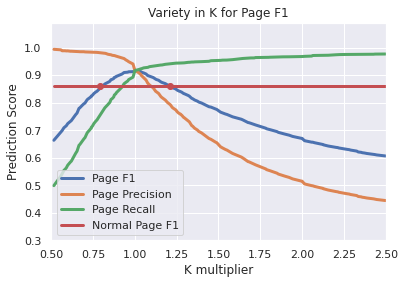

In [ ]:
sns.set_theme()

x = res_df['k_mult'].values
bd = res_df['Boundary'].values
bd_base = res_df['basic_bound'].values
bd_p = res_df['bd_precision'].values
bd_r = res_df['bd_recall'].values

plt.plot(x, bd, '-', label ='Page F1', linewidth=3)
plt.plot(x, bd_p, '-', label ='Page Precision', linewidth=3)
plt.plot(x, bd_r, '-', label ='Page Recall', linewidth=3)
plt.plot(x, bd_base, '-', label ='Normal Page F1', linewidth=3)

idx_bd = np.argwhere(np.diff(np.sign(bd - bd_base))).flatten()
plt.plot([0.79,1.21], [0.86,.86], 'ro', linewidth=5)

plt.title("Variety in K for Page F1")
plt.xlabel("K multiplier")
plt.ylabel("Prediction Score")
plt.legend(loc = 'best')
plt.ylim(0.3, 1.09)
plt.xlim(0.5, 2.5)

plt.show()

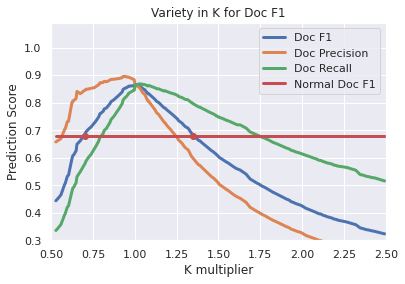

In [ ]:
sns.set_theme()

x = res_df['k_mult'].values
wb = res_df['WB'].values
wb_base = res_df['basic_wb'].values
wb_p = res_df['wb_precision'].values
wb_r = res_df['wb_recall'].values

plt.plot(x, wb, '-', label ='Doc F1', linewidth=3)
plt.plot(x, wb_r, '-', label ='Doc Precision', linewidth=3)
plt.plot(x, wb_p, '-', label ='Doc Recall', linewidth=3)
plt.plot(x, wb_base, '-', label = 'Normal Doc F1', linewidth=3)

plt.plot([0.7,1.35], [0.68,0.68], 'ro')

plt.title("Variety in K for Doc F1")
plt.xlabel("K multiplier")
plt.ylabel("Prediction Score")
plt.legend(loc = 'best')
plt.ylim(0.3, 1.09)
plt.xlim(0.5, 2.5)
plt.show()

## Predicting K using XGBOOST

In [ ]:
def stream_to_vec(doc_dists, n_pages, corp, n_corps = 2, add_up = True):
  all_hists = []
  cmbd_hist = np.zeros(10)
  for doc_dist in doc_dists:
    hist, bin_edges = np.histogram(doc_dist, density=False,bins=np.arange(0,1.1,0.1))
    if add_up:
      cmbd_hist += hist
    else:  
      all_hists += list(hist)

  if add_up:
    vec_arr = np.array([n_pages] + list(cmbd_hist))
  else:
    vec_arr = np.array([n_pages] + list(all_hists))
  return vec_arr

In [ ]:
train_data = pd.read_csv('/content/gdrive/MyDrive/master_thesis/new_corpus/train_data.csv')
combined_corp2 = pd.concat([test_data, train_data], ignore_index=True, sort=False)

In [ ]:
gold_std_dict_all = {}
for doc_id,content in combined_corp2.groupby('name'):
    repl_doc_id = doc_id.replace('__concatenated','')
    content = content.sort_values(by='page')
    gold_std = content['label'].values
    gold_std_dict_all[repl_doc_id] = gold_std

In [ ]:
import pickle
test_vals = test_data['name'].unique()
import itertools
test_distlists = {}
train_distlists = {}

use_dist_list = True

train_text_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/train_text_pretrained_corp2'
train_im_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/vgg_train'

test_text_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors'
test_im_folder = '/content/gdrive/MyDrive/master_thesis/new_corpus/VGG_vectors'

stuff = [0,1]

all_train = []
all_test = []
for L in range(1,len(stuff) + 1):
  for subset in itertools.combinations(stuff, L):
    test_set = {'streams':[],'vectors' : [], 'gold_std' : []}
    train_set = {'streams':[],'vectors' : [], 'gold_std' : []}
    print(subset)
    for doc_id, content in tqdm(combined_corp2.groupby('name')):
      repl_doc_id = doc_id.replace('__concatenated','')
      content = content.sort_values(by='page')
      corpus = content['corpus'].iloc[0]
      gold_std = gold_std_dict_all[repl_doc_id]
      n_docs = sum(gold_std)
      if n_docs > 1:
        n_pages = len(gold_std)

        if doc_id in test_vals:
          corpus_im_folder = test_im_folder
        else:
          corpus_im_folder = train_im_folder
        im_page_vectors_path = os.path.join(corpus_im_folder,doc_id+'.npy')
        im_page_vectors = np.load(im_page_vectors_path)
        
        if doc_id in test_vals:
          corpus_text_folder = test_text_folder
          text_page_vectors_path = os.path.join(corpus_text_folder,doc_id+'.pickle')
          with open(text_page_vectors_path, 'rb') as f:
            text_page_vectors = pickle.load(f)
            f.close()
          
          #text_page_vectors = np.load(text_page_vectors_path)
        else:
          corpus_text_folder = train_text_folder
          text_page_vectors_path = os.path.join(corpus_text_folder,doc_id+'_.npy')
          text_page_vectors = np.load(text_page_vectors_path)
        
        
        used_vectors = text_page_vectors

        dist_list = []
        for i in range(len(used_vectors)-1):
          current_vector = used_vectors[i]
          next_vector = used_vectors[i+1]
          dist = distance.cosine(current_vector, next_vector)
          dist_list.append(dist)
        dist_list = np.array(dist_list)
        if len(dist_list) >1:
          dist_list_norm_text = (dist_list - np.min(dist_list)) / (np.max(dist_list) - np.min(dist_list))
        else:
          dist_list_norm_text = dist_list

        used_vectors = im_page_vectors

        dist_list = []
        for i in range(len(used_vectors)-1):
          current_vector = used_vectors[i]
          next_vector = used_vectors[i+1]
          dist = distance.cosine(current_vector, next_vector)
          dist_list.append(dist)
        dist_list = np.array(dist_list)
        if len(dist_list) >1:
          dist_list_norm_image = (dist_list - np.min(dist_list)) / (np.max(dist_list) - np.min(dist_list))
        else:
          dist_list_norm_image = dist_list

        both_dist_lists = [dist_list_norm_image,dist_list_norm_text]
        selected = [both_dist_lists[id] for id in subset]

        if use_dist_list:
          stream_vec = stream_to_vec(selected,n_pages, corpus, add_up = False)
        else:
          preds_flattend = prediction_json_corp1[doc_id].flatten()
          stream_vec = stream_to_vec(preds_flattend, n_pages, corpus)
        if doc_id in test_vals:
          test_set['vectors'].append(stream_vec)
          test_set['gold_std'].append(n_docs)
          test_set['streams'].append(doc_id)
        else:
          train_set['vectors'].append(stream_vec)
          train_set['gold_std'].append(n_docs)
          train_set['streams'].append(doc_id)


    all_train.append(train_set)
    all_test.append(test_set)
    model = XGBRegressor(objective = 'reg:squarederror')
    model.fit(train_set['vectors'], train_set['gold_std'])
    predictions = model.predict(test_set['vectors'])
    pred_round = np.round(predictions)
    mse_score = mean_squared_error(test_set['gold_std'],pred_round)
    print(mse_score)

    # use predictions for classification
    predictedk_topk = {'bd' : [], 'wb' : []}
    for i,stream in enumerate(test_set['streams']):
      n_pages =len(gold_std_dict[stream])
      n_docs = sum(gold_std_dict[stream])

      if n_docs > 1:

        predicted_k = int(pred_round[i])
        predicted_k = min(n_pages,predicted_k)
        predicted_k = max(predicted_k,1)
        pred = prediction_json_corp2[stream]
        pred_flat = set_first_value1(pred.flatten())
        topn = select_topn(pred_flat,predicted_k)

        predictedk_topk['bd'].append(f1(gold_std_dict[stream], topn))
        predictedk_topk['wb'].append(IoU_F1(bin_to_length_list(gold_std_dict[stream]), bin_to_length_list(topn)))

    print(np.mean(predictedk_topk['bd']))
    print(np.mean(predictedk_topk['wb']))
  
  print()
  print('-------------------------------')
  print()

(0,)


100%|██████████| 108/108 [00:33<00:00,  3.25it/s]


15641.28125
0.7913441702868792
0.6611213507348218
(1,)


100%|██████████| 108/108 [00:15<00:00,  6.77it/s]


8519.25
0.7804526675274585
0.6439613516487818

-------------------------------

(0, 1)


100%|██████████| 108/108 [00:15<00:00,  6.82it/s]


11459.90625
0.7924071175454248
0.6574243469405079

-------------------------------



In [ ]:
# https://machinelearningmastery.com/xgboost-for-regression/
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


searching hyperparameters
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook


In [ ]:
train_set = all_train[0]
test_set = all_test[0]

In [ ]:
train_sts, val_sts = train_test_split(train_arr, test_size =0.2)

In [ ]:
self_hp = {'n_est' : [100,200,300,500,1000],
           'depth' : [3,4,5,6,7,8],
           'lr' : [0.3,0.1,0.01,0.001],
           'gamma' : [0,0.1,0.2,0.3,0.01]}

In [ ]:
X_train = list(train_sts[:,:10])
Y_train = list(train_sts[:,-1])
X_val = list(val_sts[:,:10])
Y_val = list(val_sts[:,-1])

In [ ]:
out_row = []
max_score = 100000
for est in self_hp['n_est']:
  for depth in self_hp['depth']:
    for lr in self_hp['lr']:
      for g in self_hp['gamma']:
        model = XGBRegressor(objective = 'reg:squarederror', n_estimators= est, 
                             max_depth=depth, learning_rate=lr, gamma = g)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_val)
        pred_round = np.round(predictions)
        mse_score = mean_squared_error(Y_val,pred_round)
        if mse_score < max_score:
          print('new HS {}'.format(mse_score))
          print('n_estimators: {}, max_depth: {}, learning_rate: {}, gamma: {}'.format(est,depth,lr,g))
          max_score = mse_score
        out_row.append([est,depth,lr,mse_score])

new HS 16966.625
n_estimators: 100, max_depth: 3, learning_rate: 0.3, gamma: 0
new HS 16942.875
n_estimators: 100, max_depth: 3, learning_rate: 0.3, gamma: 0.1
new HS 16934.3125
n_estimators: 100, max_depth: 3, learning_rate: 0.3, gamma: 0.01
new HS 16545.9375
n_estimators: 300, max_depth: 3, learning_rate: 0.01, gamma: 0


In [ ]:
# Best parameters are very dependent on which stream is selected. There is too much varianceS

# for one specific val set
#n_estimators: 1000, max_depth: 6, learning_rate: 0.01, gamma: 0.2

#n_estimators: 1000, max_depth: 3, learning_rate: 0.01, gamma: 0.1

#n_estimators: 100, max_depth: 8, learning_rate: 0.3, gamma: 0.3

#None of the above perform bette than the base metrics on the real test set for 
#corpus 1


In [ ]:
model = XGBRegressor(objective = 'reg:squarederror')

model.fit(train_set['vectors'], train_set['gold_std'])
predictions = model.predict(test_set['vectors'])
pred_round = np.round(predictions)
mse_score = mean_squared_error(test_set['gold_std'],pred_round)
mse_score

15641.28125

In [ ]:
abs_dist_lower = []
abs_dist_higher = []
for i,pred_k in enumerate(pred_round):
  gld = test_set['gold_std'][i]
  pred_k = int(pred_k)
  dist = pred_k / gld
  if dist > 1:
    abs_dist_higher.append(dist)
  else:
    abs_dist_lower.append(dist)

print(np.mean(abs_dist_higher))
print(np.mean(abs_dist_lower))

1.9573134616630008
0.7890677426337812


We can see that with this predictions there is no way to go above the basic prection value

In [ ]:
# use predictions for classification
for mult in np.arange(1,2.3,0.1):
  predictedk_topk = {'bd' : [], 'wb' : []}
  for i,stream in enumerate(test_set['streams']):
    n_pages = len(gold_std_dict[stream])

    predicted_k = int(pred_round[i] * mult)
    predicted_k = min(n_pages,predicted_k)
    predicted_k = max(predicted_k,1)
    pred = prediction_json_corp2[stream]
    pred_flat = set_first_value1(pred.flatten())
    topn = select_topn(pred_flat,predicted_k)

    predictedk_topk['bd'].append(f1(gold_std_dict[stream], topn))
    predictedk_topk['wb'].append(IoU_F1(bin_to_length_list(gold_std_dict[stream]), bin_to_length_list(topn)))

  print(mult)
  print(np.mean(predictedk_topk['bd']))
  print(np.mean(predictedk_topk['wb']))


1.0
0.7913441702868792
0.6611213507348218


KeyboardInterrupt: ignored

# Looking into vector scales

In [ ]:
vector_path_im = '/content/gdrive/MyDrive/master_thesis/new_corpus/image_vectors'
vector_path_text = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors_finetuned'
im_sums = []
text_sums = []
for doc_id, content in tqdm(test_data.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path_text,repl_doc_id + '.npy')):
    continue
  text_vectors = np.load(os.path.join(vector_path_text,repl_doc_id + '.npy'))
  labels = gold_std_dict[repl_doc_id]

  if not os.path.exists(os.path.join(vector_path_im,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path_im,repl_doc_id + '.npy'))

  im_sum = np.sum(abs(image_vectors)) / (image_vectors.shape[0] * image_vectors.shape[1])
  text_sum = np.sum(abs(text_vectors)) / (text_vectors.shape[0] * text_vectors.shape[1])

  im_sums.append(im_sum)
  text_sums.append(text_sum)


100%|██████████| 34/34 [00:00<00:00, 76.40it/s]


In [ ]:
np.mean(im_sums)

1.0487018754635196

In [ ]:
np.mean(text_sums)

1.3487607673982636

Pretrained

In [ ]:
import pickle
vector_path_im = '/content/gdrive/MyDrive/master_thesis/new_corpus/VGG_vectors'
vector_path_text = '/content/gdrive/MyDrive/master_thesis/new_corpus/text_vectors'
im_sums = []
text_sums = []
for doc_id, content in tqdm(test_data.groupby('name')):
  repl_doc_id = doc_id.replace('__concatenated','')
  corpus = content['corpus'].iloc[0]

  #text_vectors, labels = get_vectors_for_stream(used_corpus,doc_id,vector_dict_used,text_vectors_used)
  if not os.path.exists(os.path.join(vector_path_text,repl_doc_id + '.pickle')):
    continue

  with open(os.path.join(vector_path_text,repl_doc_id + '.pickle'), 'rb') as f:
    text_vectors = pickle.load(f)
    f.close()
  labels = gold_std_dict[repl_doc_id]

  if not os.path.exists(os.path.join(vector_path_im,repl_doc_id + '.npy')):
    continue
  image_vectors = np.load(os.path.join(vector_path_im,repl_doc_id + '.npy'))

  im_sum = np.sum(abs(image_vectors)) / (image_vectors.shape[0] * image_vectors.shape[1])
  text_sum = np.sum(abs(text_vectors)) / (text_vectors.shape[0] * text_vectors.shape[1])

  im_sums.append(im_sum)
  text_sums.append(text_sum)


100%|██████████| 34/34 [00:34<00:00,  1.03s/it]


In [ ]:
np.mean(im_sums)

0.4009285557109275

In [ ]:
np.mean(text_sums)

0.028608676416994133